In [13]:
from layout_module import Layout, NestedTuple,Pointed
from layout_module import layout_algebra as la
from layout_module import flat_algebra as fa
from functools import reduce
from operator import mul

In [14]:
def to_layout(X):
  s,t,prof = X.domain.int_tuple, X.co_domain.int_tuple, X.domain.prof
  d = []
  for i in range(len(s)):
    v = X.morphism.map[i] 
    if v == Pointed.astr: 
      d.append(0)
    else: 
      d.append(reduce(mul,t[0:v],1))
  
  shape = NestedTuple(s,prof)
  stride = NestedTuple(d, prof)
  return Layout(shape, stride)

In [15]:
s1,d1 = (6,6),(6,1)
s2,d2 = (12,3,6),(1,72,12)

L1 = Layout(NestedTuple.from_literal(s1), NestedTuple.from_literal(d1))
L2 = Layout(NestedTuple.from_literal(s2), NestedTuple.from_literal(d2))


L1.is_tractable()
L2.is_tractable()
comp = la.compose(L1,L2)

L_comp = to_layout(comp)
L_comp



Layout(shape=((2, 3), (6,)), stride=((6, 72), (1,)))

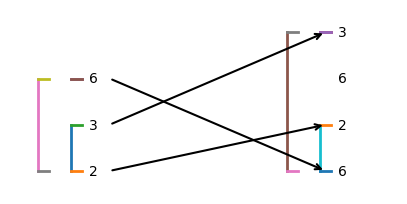

In [16]:
comp.draw()

In [17]:
s1,d1 = (4,8),(1,4)
s2,d2 = (2,2),(1,4)

L1 = Layout(NestedTuple.from_literal(s1), NestedTuple.from_literal(d1))
L2 = Layout(NestedTuple.from_literal(s2), NestedTuple.from_literal(d2))


print(L1.is_tractable())
print(L2.is_tractable())


True
True


In [19]:
L2.construct_N_complement(L1.size)

Layout(shape=(1, 2, 4), stride=(1, 2, 8))